# The problems You Give Us

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

import time

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [2]:
import mlrose_hiive

## Knapsack

In [3]:
weights = np.random.choice(range(5, 26), size = 25, p = [1/21 for i in range(21)])
values = np.random.choice(range(1, 6), size = 25, p = [1/5 for i in range(5)])
print("values:", values)
print("weights:", weights)

max_weight_pct = 0.6

fitness = mlrose_hiive.Knapsack(weights, values, max_weight_pct)
pb2 = mlrose_hiive.DiscreteOpt(length = 25, fitness_fn = fitness, maximize = True, max_val=2)

init_state = np.zeros(25)

values: [4 3 5 1 2 2 3 2 5 5 4 1 4 4 5 5 4 2 1 1 3 3 2 1 3]
weights: [25 25 15  6 11 16 18  5 24  9 25  9 18 24 16 21 19 24 25 23 21  5 21 10
  5]


In [4]:
t1= time.time()
bestSA = mlrose_hiive.simulated_annealing(pb2, max_attempts = 20, max_iters = 1000,
                                         init_state = init_state, random_state = 2, curve = True)
timeSA = time.time()-t1

In [5]:
t1= time.time()
bestRHC = mlrose_hiive.random_hill_climb(pb2, max_attempts = 20, max_iters = 1000,
                                        init_state = init_state, random_state = 2,
                                         restarts = 50, curve = True)
timeRHC = time.time()-t1

In [6]:
t1= time.time()
bestGA = mlrose_hiive.genetic_alg(pb2, max_attempts = 20, max_iters = 1000,
                                 random_state = 2, curve = True, pop_size = 20)
timeGA = time.time()-t1

In [7]:
t1 = time.time()
bestMM = mlrose_hiive.mimic(pb2, max_iters = 1000, curve = True, random_state = 2)
timeMM = time.time()-t1

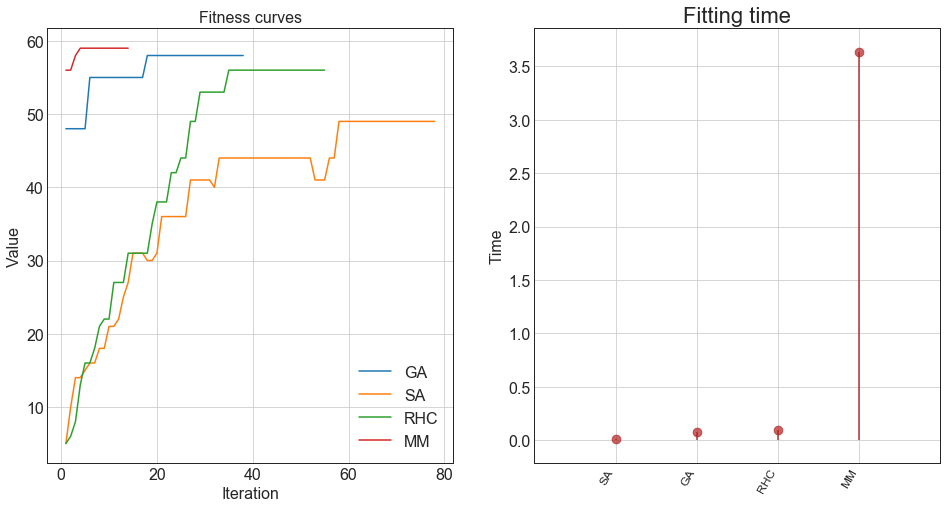

In [8]:
listGA = list(bestGA[2][i][0] for i in range(len(bestGA[2])))
listRHC = list(bestRHC[2][i][0] for i in range(len(bestRHC[2])))
listSA = list(bestSA[2][i][0] for i in range(len(bestSA[2])))
listMM = list(bestMM[2][i][0] for i in range(len(bestMM[2])))

f, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].set_title("Fitness curves")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Value")
axes[0].grid()

axes[0].plot(range(1, len(listGA)+1), listGA, label = "GA")
axes[0].plot(range(1, len(listSA)+1), listSA, label = "SA")
axes[0].plot(range(1, len(listRHC)+1), listRHC, label = "RHC")
axes[0].plot(range(1, len(listMM)+1), listMM, label = "MM")

axes[0].legend(loc="best")

axes[1].vlines(x=[2, 4, 6, 8], ymin=0, ymax=[timeSA, timeGA, timeRHC, timeMM], color='firebrick', alpha=0.7, linewidth=2)
axes[1].scatter(x=[2, 4, 6, 8], y=[timeSA, timeGA, timeRHC, timeMM], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
axes[1].set_title('Fitting time', fontdict={'size':22})
axes[1].set_ylabel('Time')
axes[1].set_xticks([2, 4, 6, 8])
axes[1].set_xticklabels(["SA", "GA", "RHC", "MM"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
axes[1].set_xlim(0, 10)
axes[1].grid()

plt.savefig("Knapsack.png")

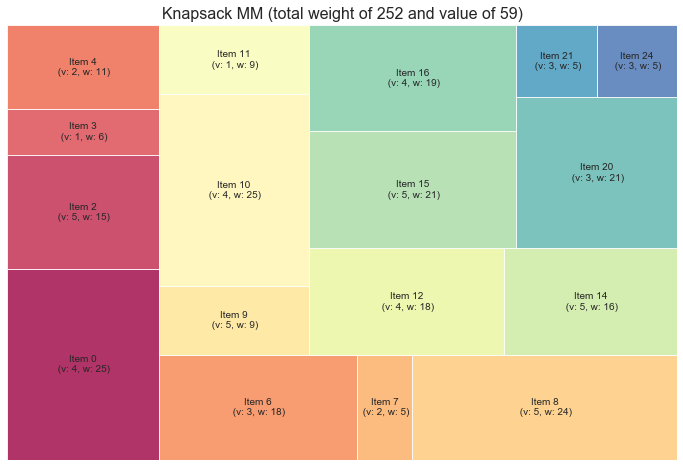

In [21]:
import squarify
totalw = np.dot(bestMM[0], weights)
value = bestMM[1]
titre = "Knapsack MM (total weight of " + str(totalw) + " and value of " + str(int(value))+")"

lab = ["Item "+str(i)+"\n (v: "+ str(values[i])+", w: "+str(weights[i])+")" for i in range(len(weights))]
siz = bestMM[0]*weights

sizes = list()
labels = list()
for i in range(len(siz)):
    if siz[i] != 0:
        labels.append(lab[i])
        sizes.append(siz[i])

colors = [plt.cm.Spectral(i/float(len(sizes))) for i in range(len(sizes))]

plt.figure(figsize = (12,8))
squarify.plot(sizes = sizes, label = labels, color = colors, alpha = .8)

plt.title(titre)
plt.axis('off')
plt.savefig('sackmm.png')


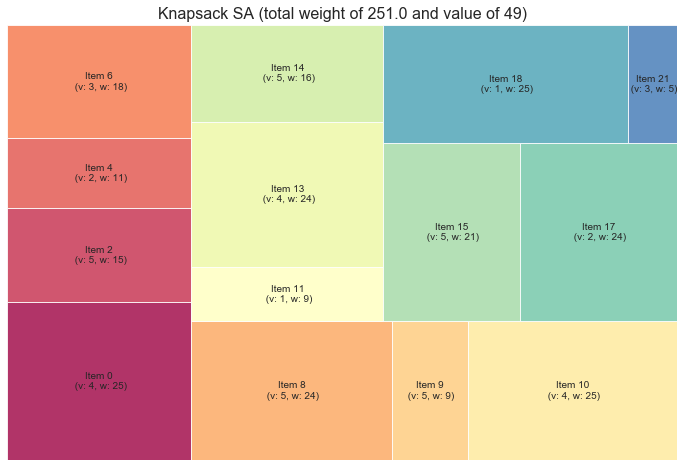

In [24]:
import squarify
totalw = np.dot(bestSA[0], weights)
value = bestSA[1]
titre = "Knapsack SA (total weight of " + str(totalw) + " and value of " + str(int(value))+")"

lab = ["Item "+str(i)+"\n (v: "+ str(values[i])+", w: "+str(weights[i])+")" for i in range(len(weights))]
siz = bestSA[0]*weights

sizes = list()
labels = list()
for i in range(len(siz)):
    if siz[i] != 0:
        labels.append(lab[i])
        sizes.append(siz[i])

colors = [plt.cm.Spectral(i/float(len(sizes))) for i in range(len(sizes))]

plt.figure(figsize = (12,8))
squarify.plot(sizes = sizes, label = labels, color = colors, alpha = .8)

plt.title(titre)
plt.axis('off')
plt.savefig('sacksa.png')

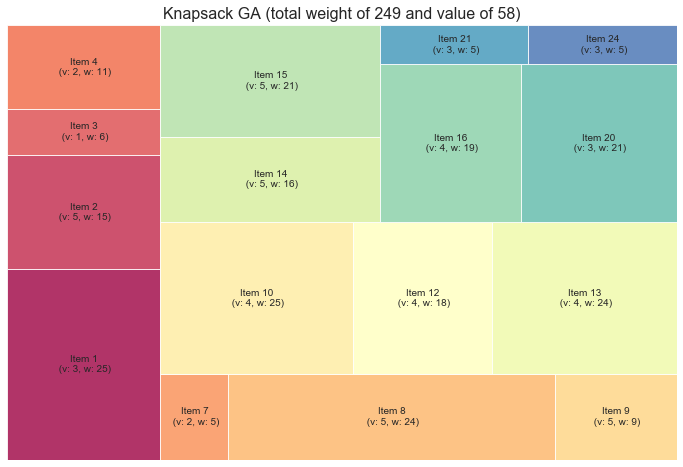

In [25]:
import squarify
totalw = np.dot(bestGA[0], weights)
value = bestGA[1]
titre = "Knapsack GA (total weight of " + str(totalw) + " and value of " + str(int(value))+")"

lab = ["Item "+str(i)+"\n (v: "+ str(values[i])+", w: "+str(weights[i])+")" for i in range(len(weights))]
siz = bestGA[0]*weights

sizes = list()
labels = list()
for i in range(len(siz)):
    if siz[i] != 0:
        labels.append(lab[i])
        sizes.append(siz[i])

colors = [plt.cm.Spectral(i/float(len(sizes))) for i in range(len(sizes))]

plt.figure(figsize = (12,8))
squarify.plot(sizes = sizes, label = labels, color = colors, alpha = .8)

plt.title(titre)
plt.axis('off')
plt.savefig('sackga.png')

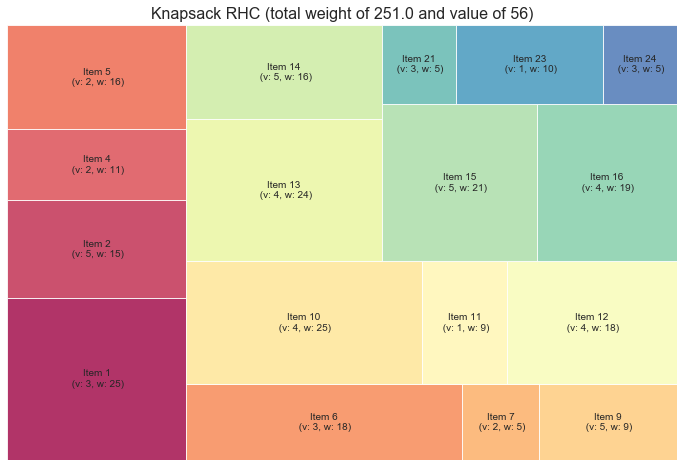

In [26]:
import squarify
totalw = np.dot(bestRHC[0], weights)
value = bestRHC[1]
titre = "Knapsack RHC (total weight of " + str(totalw) + " and value of " + str(int(value))+")"

lab = ["Item "+str(i)+"\n (v: "+ str(values[i])+", w: "+str(weights[i])+")" for i in range(len(weights))]
siz = bestRHC[0]*weights

sizes = list()
labels = list()
for i in range(len(siz)):
    if siz[i] != 0:
        labels.append(lab[i])
        sizes.append(siz[i])

colors = [plt.cm.Spectral(i/float(len(sizes))) for i in range(len(sizes))]

plt.figure(figsize = (12,8))
squarify.plot(sizes = sizes, label = labels, color = colors, alpha = .8)

plt.title(titre)
plt.axis('off')
plt.savefig('sackrhc.png')

## Count Ones

In [48]:
fitness = mlrose_hiive.OneMax()

In [49]:
def qr(array):
    ini = np.zeros((24,24))
    for i in range(24):
        for j in range(24):
            ind = i*24+j
            ini[i][j] = array[ind]
    return ini

In [51]:
pb1 = mlrose_hiive.DiscreteOpt(length = 24*24, fitness_fn = fitness, maximize = True, max_val = 2)

init_state = np.random.choice([0, 1], size = 24*24, p = [1/2, 1/2])

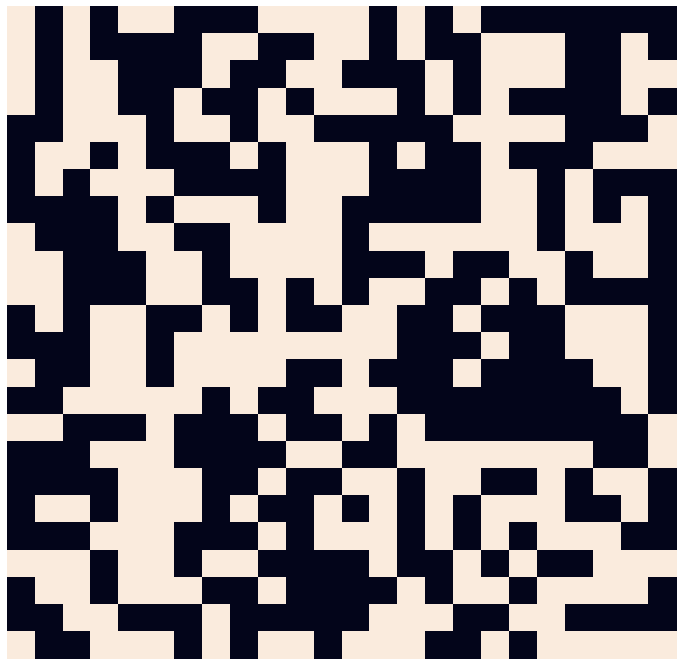

In [406]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(ini, annot = False, cbar = False, xticklabels = False, yticklabels = False)
plt.savefig("CountOneInit24.png")

In [58]:
t1= time.time()
bestSA = mlrose_hiive.simulated_annealing(pb1, max_attempts = 20, max_iters = 1000,
                                         init_state = init_state, random_state = 2, curve = True)
timeSA = time.time()-t1

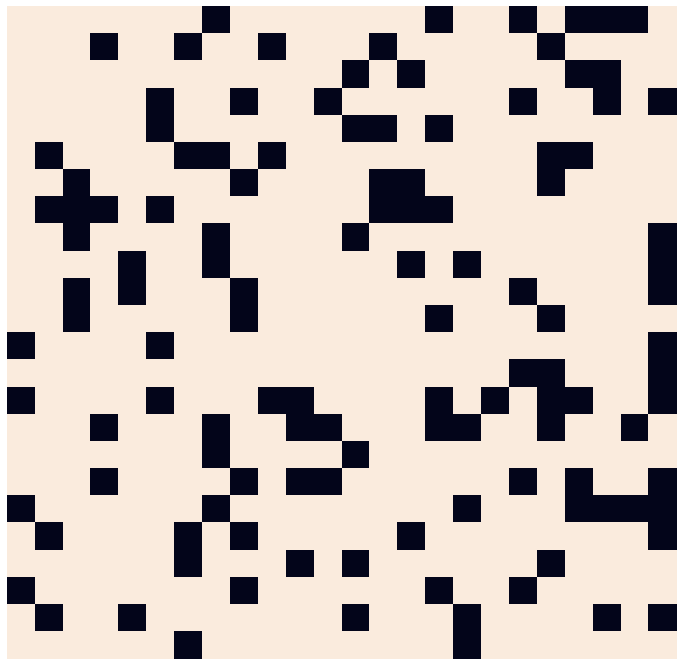

In [407]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(qr(bestSA[0]), annot = False, cbar = False, xticklabels = False, yticklabels = False)
plt.savefig("CountOneSA24.png")

In [59]:
t1= time.time()
bestRHC = mlrose_hiive.random_hill_climb(pb1, max_attempts = 20, max_iters = 1000,
                                        init_state = init_state, random_state = 2,
                                         restarts = 50, curve = True)
timeRHC = time.time()-t1

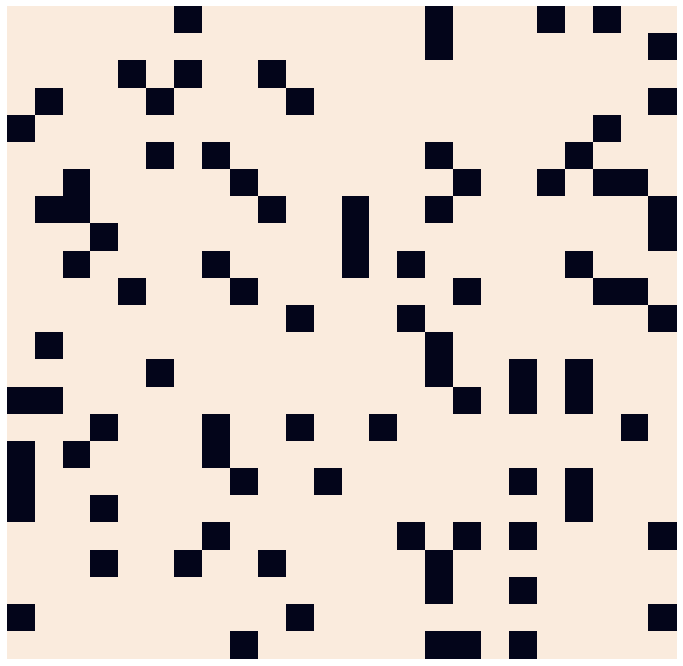

In [408]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(qr(bestRHC[0]), annot = False, cbar = False, xticklabels = False, yticklabels = False)
plt.savefig("CountOneRHC24.png")

In [60]:
t1= time.time()
bestGA = mlrose_hiive.genetic_alg(pb1, max_attempts = 20, max_iters = 1000,
                                 random_state = 2, curve = True, pop_size = 20)
timeGA = time.time()-t1

In [55]:
#t1= time.time()
#bestMM = mlrose_hiive.mimic(pb1,max_iters = 1000, curve = True, random_state = 2)
#timeMM = time.time()-t1

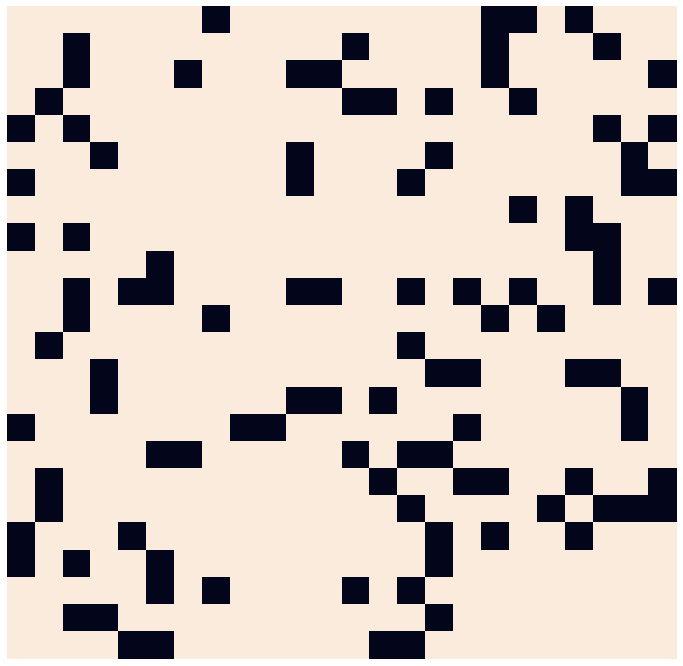

In [409]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(qr(bestGA[0]), annot = False, cbar = False, xticklabels = False, yticklabels = False)
plt.savefig("CountOneGA24.png")

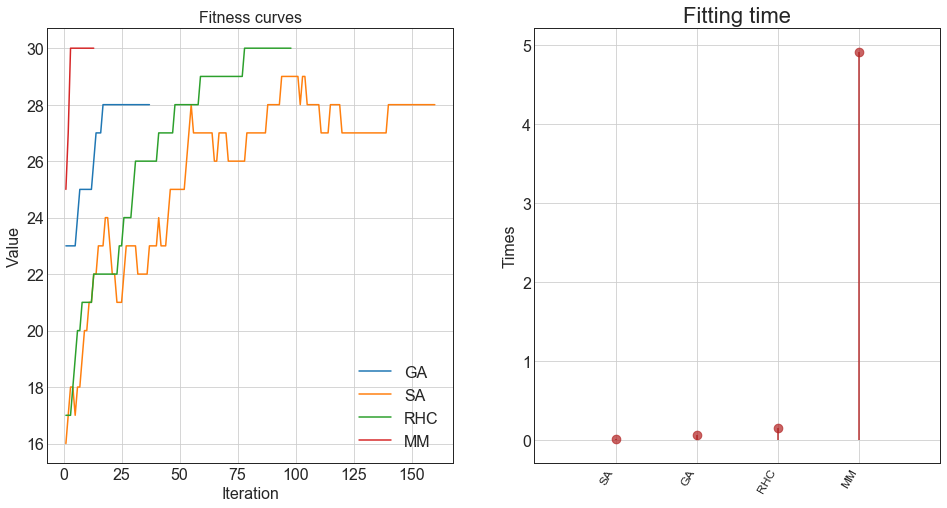

In [61]:
listGA = list(bestGA[2][i][0] for i in range(len(bestGA[2])))
listRHC = list(bestRHC[2][i][0] for i in range(len(bestRHC[2])))
listSA = list(bestSA[2][i][0] for i in range(len(bestSA[2])))
#listMM = list(bestMM[2][i][0] for i in range(len(bestMM[2])))

f, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].set_title("Fitness curves")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Value")
axes[0].grid()

axes[0].plot(range(1, len(listGA)+1), listGA, label = "GA")
axes[0].plot(range(1, len(listSA)+1), listSA, label = "SA")
axes[0].plot(range(1, len(listRHC)+1), listRHC, label = "RHC")
#axes[0].plot(range(1, len(listMM)+1), listMM, label = "MM")

axes[0].legend(loc="best")

axes[1].vlines(x=[2, 5, 8], ymin=0, ymax=[timeSA, timeGA, timeRHC], color='firebrick', alpha=0.7, linewidth=2)
axes[1].scatter(x=[2, 5, 8], y=[timeSA, timeGA, timeRHC], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
axes[1].set_title('Fitting time', fontdict={'size':22})
axes[1].set_ylabel('Times')
axes[1].set_xticks([2, 5, 8])
axes[1].set_xticklabels(["SA", "GA", "RHC"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
axes[1].set_xlim(0, 10)
axes[1].grid()

plt.savefig("CountOnes24.png")

## 4-peaks

In [29]:
fitness = mlrose_hiive.FourPeaks(t_pct = 0.1)
state = np.random.choice([0, 1], size = (30), p = [1/2, 1/2])
print(state)
pb3 = mlrose_hiive.DiscreteOpt(length = 30, fitness_fn = fitness, maximize = True, max_val=2)

[0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1]


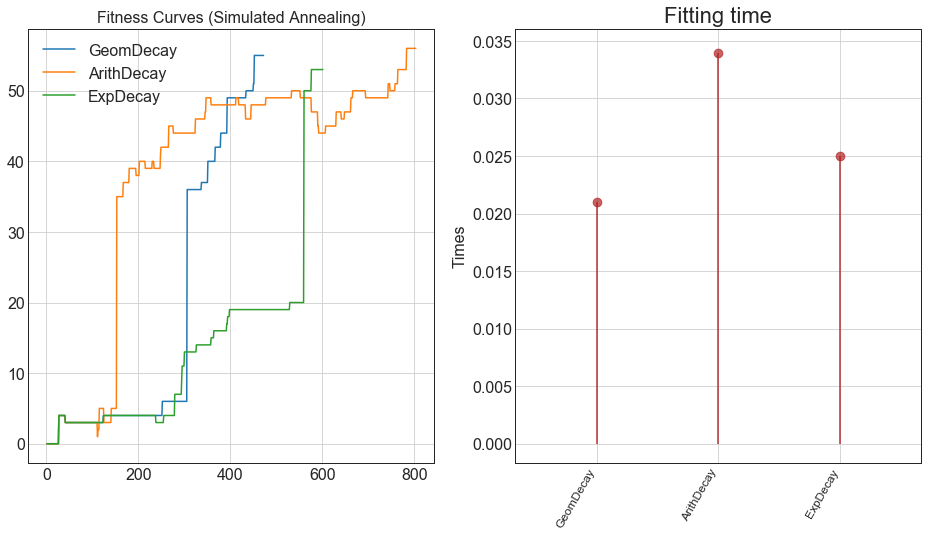

In [38]:
list_decay = [mlrose_hiive.GeomDecay(), mlrose_hiive.ArithDecay(), mlrose_hiive.ExpDecay()]
titre = ["GeomDecay", "ArithDecay", "ExpDecay"]
timeSA = list()
i = 0

f, ax = plt.subplots(1, 2, figsize = (16, 8))

for decay in list_decay: 
    t1= time.time()
    bestSA = mlrose_hiive.simulated_annealing(pb3, schedule = decay, max_attempts = 20, max_iters = 1000,
                                             init_state = state, random_state = 2, curve = True)
    timeSAd = time.time()-t1
    timeSA.append(timeSAd)
    listSA = list(bestSA[2][i][0] for i in range(len(bestSA[2])))
    ax[0].plot(range(1, len(listSA)+1), listSA, label = titre[i])
    
    i+=1
    
ax[0].set_title("Fitness Curves (Simulated Annealing)")
ax[0].grid()
ax[0].legend(loc = 'best')

ax[1].vlines(x=[2, 5, 8], ymin=0, ymax=timeSA, color='firebrick', alpha=0.7, linewidth=2)
ax[1].scatter(x=[2, 5, 8], y=timeSA, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax[1].set_title('Fitting time', fontdict={'size':22})
ax[1].set_ylabel('Times')
ax[1].set_xticks([2, 5, 8])
ax[1].set_xticklabels(titre, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax[1].set_xlim(0, 10)
ax[1].grid()

plt.savefig("4P_SA.png")

In [39]:
t1= time.time()
bestSA = mlrose_hiive.simulated_annealing(pb3, max_attempts = 20, max_iters = 1000,
                                         init_state = state, random_state = 2, curve = True)
timeSA = time.time()-t1

t1= time.time()
bestRHC = mlrose_hiive.random_hill_climb(pb3, max_attempts = 20, max_iters = 1000,
                                        init_state = state, random_state = 2,
                                         restarts = 50, curve = True)
timeRHC = time.time()-t1

t1= time.time()
bestGA = mlrose_hiive.genetic_alg(pb3, max_attempts = 20, max_iters = 1000,
                                 random_state = 2, curve = True, pop_size = 20)
timeGA = time.time()-t1

t1 = time.time()
bestMM = mlrose_hiive.mimic(pb3, max_iters = 1000, curve = True, random_state = 2)
timeMM = time.time()-t1

T = [timeSA, timeRHC, timeGA, timeMM]

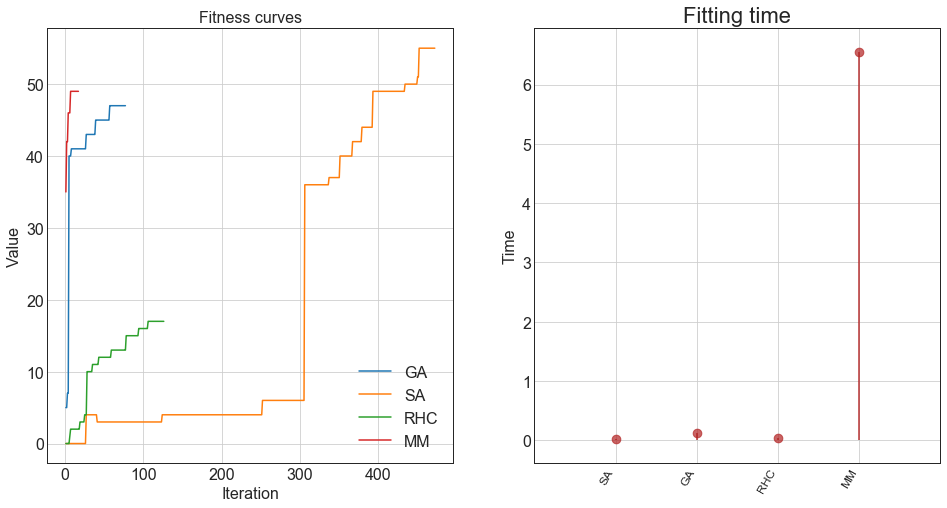

In [40]:
listGA = list(bestGA[2][i][0] for i in range(len(bestGA[2])))
listRHC = list(bestRHC[2][i][0] for i in range(len(bestRHC[2])))
listSA = list(bestSA[2][i][0] for i in range(len(bestSA[2])))
listMM = list(bestMM[2][i][0] for i in range(len(bestMM[2])))

f, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].set_title("Fitness curves")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Value")
axes[0].grid()

axes[0].plot(range(1, len(listGA)+1), listGA, label = "GA")
axes[0].plot(range(1, len(listSA)+1), listSA, label = "SA")
axes[0].plot(range(1, len(listRHC)+1), listRHC, label = "RHC")
axes[0].plot(range(1, len(listMM)+1), listMM, label = "MM")

axes[0].legend(loc="best")

axes[1].vlines(x=[2, 4, 6, 8], ymin=0, ymax=[timeSA, timeGA, timeRHC, timeMM], color='firebrick', alpha=0.7, linewidth=2)
axes[1].scatter(x=[2, 4, 6, 8], y=[timeSA, timeGA, timeRHC, timeMM], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
axes[1].set_title('Fitting time', fontdict={'size':22})
axes[1].set_ylabel('Time')
axes[1].set_xticks([2, 4, 6, 8])
axes[1].set_xticklabels(["SA", "GA", "RHC", "MM"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
axes[1].set_xlim(0, 10)
axes[1].grid()

plt.savefig("4peaks.png")

In [70]:
list0 = np.asarray([1]+[0 for i in range(29)])
list1 = np.asarray([1 for i in range(29)] + [0])
list2 = np.random.choice([0, 1], size = (30), p = [1/2, 1/2])
list3 = np.asarray([list2[i] for i in range(13)] + [1-list2[13]] + [list2[i] for i in range(14, 30)])

print(list0)
print(list1)
print(list2)
print(list3)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
[0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]


In [73]:
t1= time.time()
bestSA0 = mlrose_hiive.simulated_annealing(pb3, max_attempts = 20, max_iters = 10000,
                                         init_state = list0, random_state = 2, curve = True)
timeSA0 = time.time()-t1

t1= time.time()
bestSA1 = mlrose_hiive.simulated_annealing(pb3, max_attempts = 20, max_iters = 10000,
                                         init_state = list1, random_state = 2, curve = True)
timeSA1 = time.time()-t1

t1= time.time()
bestSA2 = mlrose_hiive.simulated_annealing(pb3, max_attempts = 20, max_iters = 10000,
                                         init_state = list2, random_state = 2, curve = True)
timeSA2 = time.time()-t1

t1= time.time()
bestSA3 = mlrose_hiive.simulated_annealing(pb3, max_attempts = 20, max_iters = 10000,
                                         init_state = list3, random_state = 2, curve = True)
timeSA3 = time.time()-t1

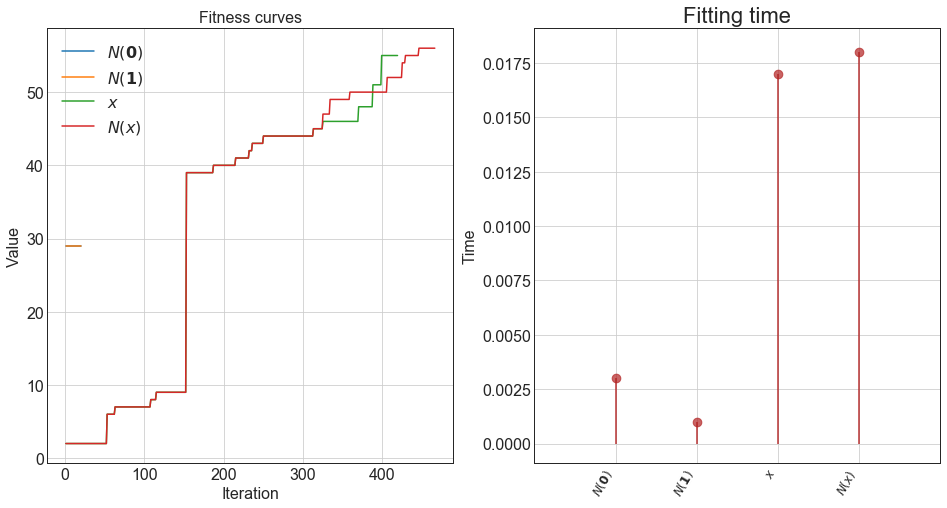

In [74]:
listSA0 = list(bestSA0[2][i][0] for i in range(len(bestSA0[2])))
listSA1 = list(bestSA1[2][i][0] for i in range(len(bestSA1[2])))
listSA2 = list(bestSA2[2][i][0] for i in range(len(bestSA2[2])))
listSA3 = list(bestSA3[2][i][0] for i in range(len(bestSA3[2])))

f, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].set_title("Fitness curves")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Value")
axes[0].grid()

axes[0].plot(range(1, len(listSA0)+1), listSA0, label = "$N(\mathbf{0})$")
axes[0].plot(range(1, len(listSA1)+1), listSA1, label = "$N(\mathbf{1})$")
axes[0].plot(range(1, len(listSA2)+1), listSA2, label = "$x$")
axes[0].plot(range(1, len(listSA3)+1), listSA3, label = "$N(x)$")

axes[0].legend(loc="best")

axes[1].vlines(x=[2, 4, 6, 8], ymin=0, ymax=[timeSA0, timeSA1, timeSA2, timeSA3], color='firebrick', alpha=0.7, linewidth=2)
axes[1].scatter(x=[2, 4, 6, 8], y=[timeSA0, timeSA1, timeSA2, timeSA3], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
axes[1].set_title('Fitting time', fontdict={'size':22})
axes[1].set_ylabel('Time')
axes[1].set_xticks([2, 4, 6, 8])
axes[1].set_xticklabels(["$N(\mathbf{0})$", "$N(\mathbf{1})$", "$x$", "$N(x)$"], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
axes[1].set_xlim(0, 10)
axes[1].grid()

plt.savefig("4pSAstability.png")

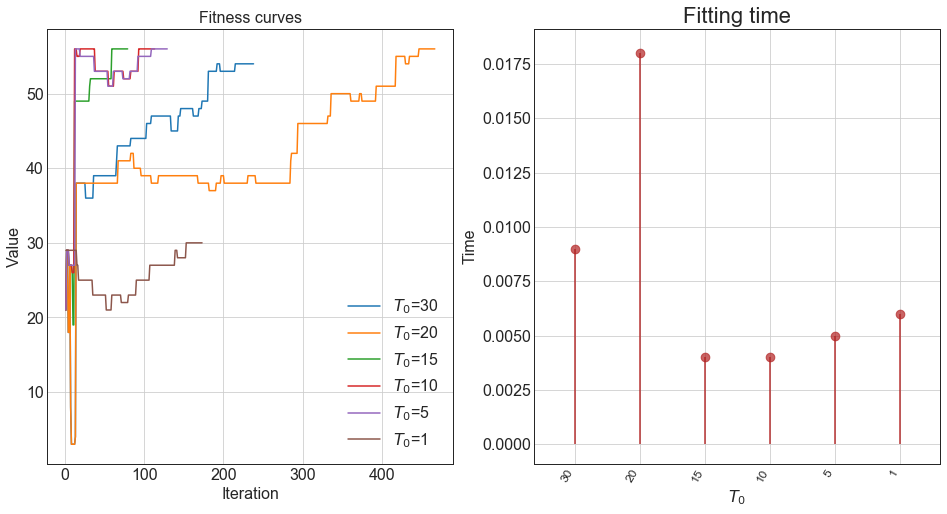

In [79]:
temp = [30, 20, 15, 10, 5, 1]
f, axes = plt.subplots(1, 2, figsize = (16, 8))
axes[0].set_title("Fitness curves")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Value")
axes[0].grid()

time_list = list()

for T in temp:
    sch = mlrose_hiive.ArithDecay(init_temp = T, decay = 0.95, min_temp = 1)
    t1= time.time()
    bestSA0 = mlrose_hiive.simulated_annealing(pb3, schedule = sch, max_attempts = 20, max_iters = 10000,
                                             init_state = list0, random_state = 2, curve = True)
    timeSA0 = time.time()-t1
    time_list.append(timeSA0)
    
    listSA0 = list(bestSA0[2][i][0] for i in range(len(bestSA0[2])))
    axes[0].plot(range(1, len(listSA0)+1), listSA0, label = "$T_0$="+str(T))

axes[0].legend(loc="best")

axes[1].vlines(x=np.linspace(1,9,6), ymin=0, ymax=time_list, color='firebrick', alpha=0.7, linewidth=2)
axes[1].scatter(x=np.linspace(1,9,6), y=time_list, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
axes[1].set_title('Fitting time', fontdict={'size':22})
axes[1].set_ylabel('Time')
axes[1].set_xlabel('$T_0$')
axes[1].set_xticks(np.linspace(1,9,6))
axes[1].set_xticklabels(temp, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
axes[1].set_xlim(0, 10)
axes[1].grid()

plt.savefig("4pSAtemp.png")

# The Problems Given To You

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import time

In [81]:
df_hos = pd.read_csv(r'hospital_mortality.csv')
df_hos.drop(columns = ['ID'], inplace = True)
df_hos = df_hos.dropna(subset = ['outcome'])
df_hos = df_hos.replace([np.inf, -np.inf], np.nan)
df_hos = df_hos.fillna(df_hos.mean())

df_hos = df_hos[['outcome', 'age','gendera', 'BMI', 'diabetes', 'heart rate', 'SP O2', 'group', 'hypertensive', 'Renal failure', 'COPD', 'CHD with no MI', 'temperature', 'Respiratory rate', 'glucose' ]]

hos_y = df_hos[['outcome']]
hos_X = df_hos.drop(axis = 1, columns = ['outcome'])

scaler = MinMaxScaler()

hosX_train, hosX_test, hosy_train, hosy_test = train_test_split(hos_X, hos_y, test_size = 0.2, random_state = 2)

hosX_tr = scaler.fit_transform(hosX_train)
hosX_te = scaler.transform(hosX_test)
hosy_tr = hosy_train.to_numpy()
hosy_te = hosy_test.to_numpy()

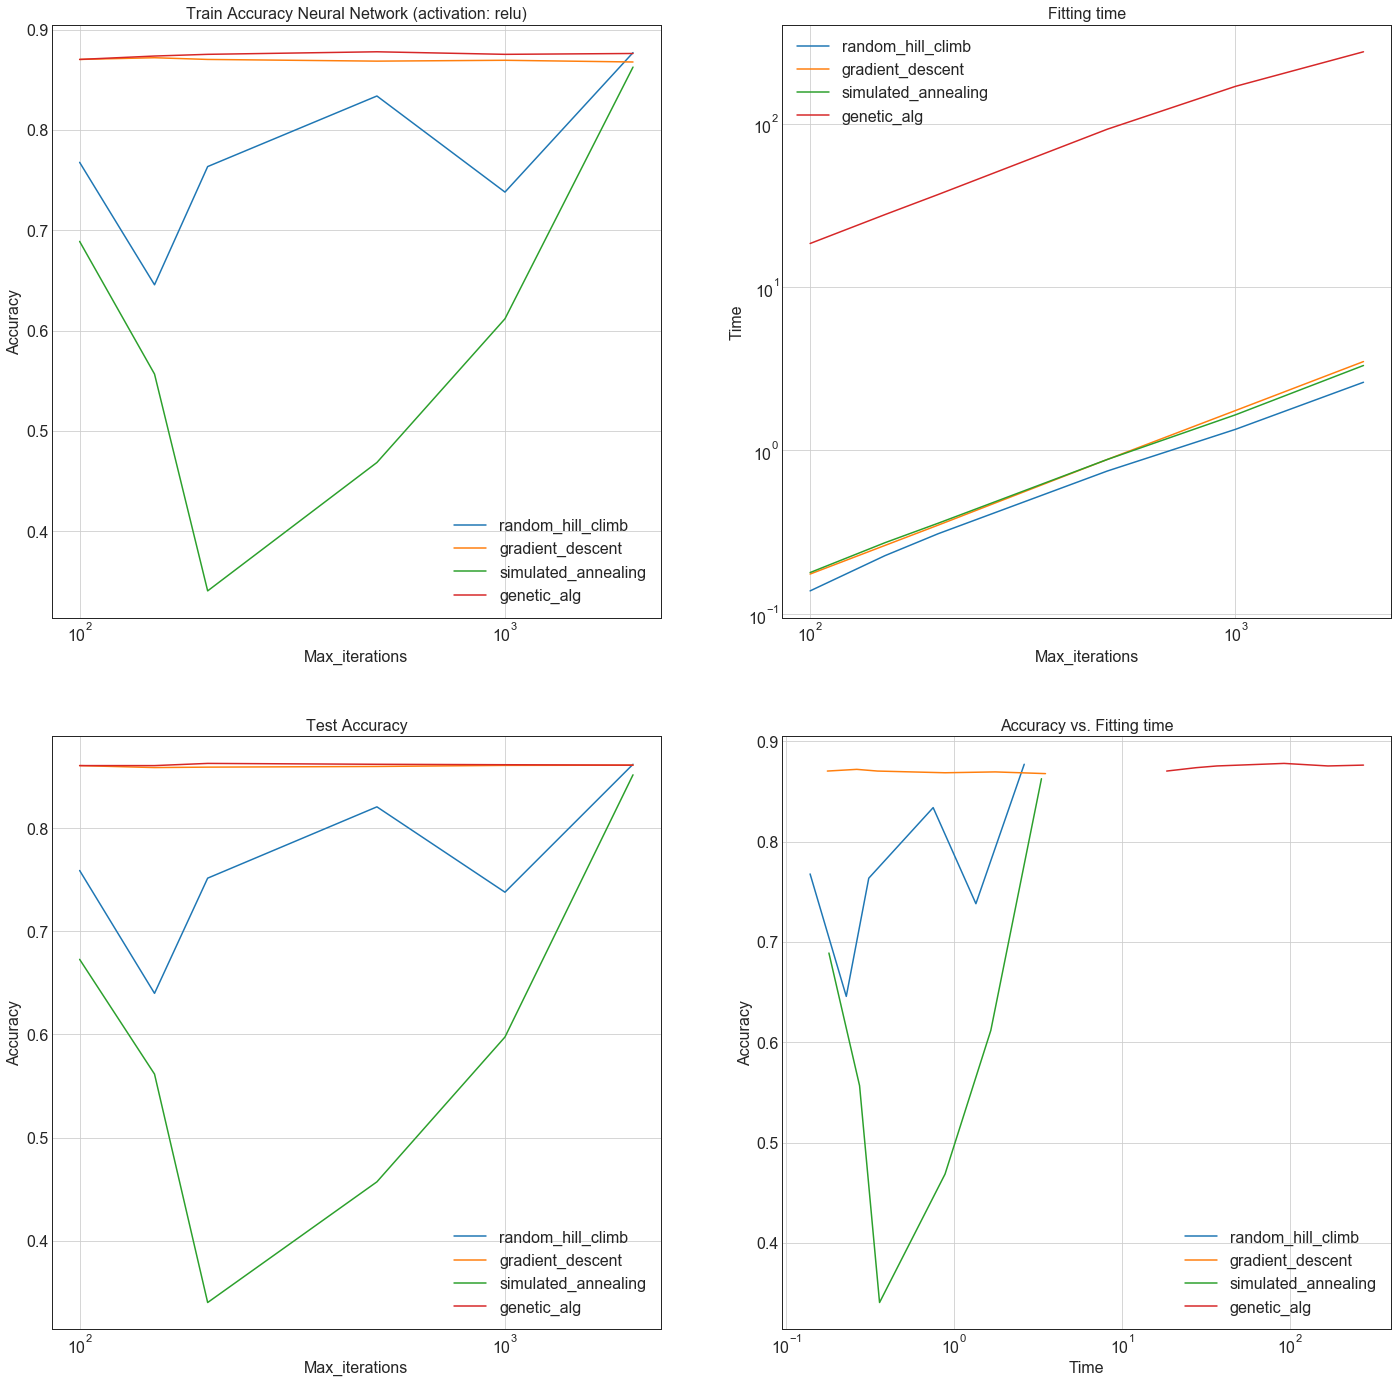

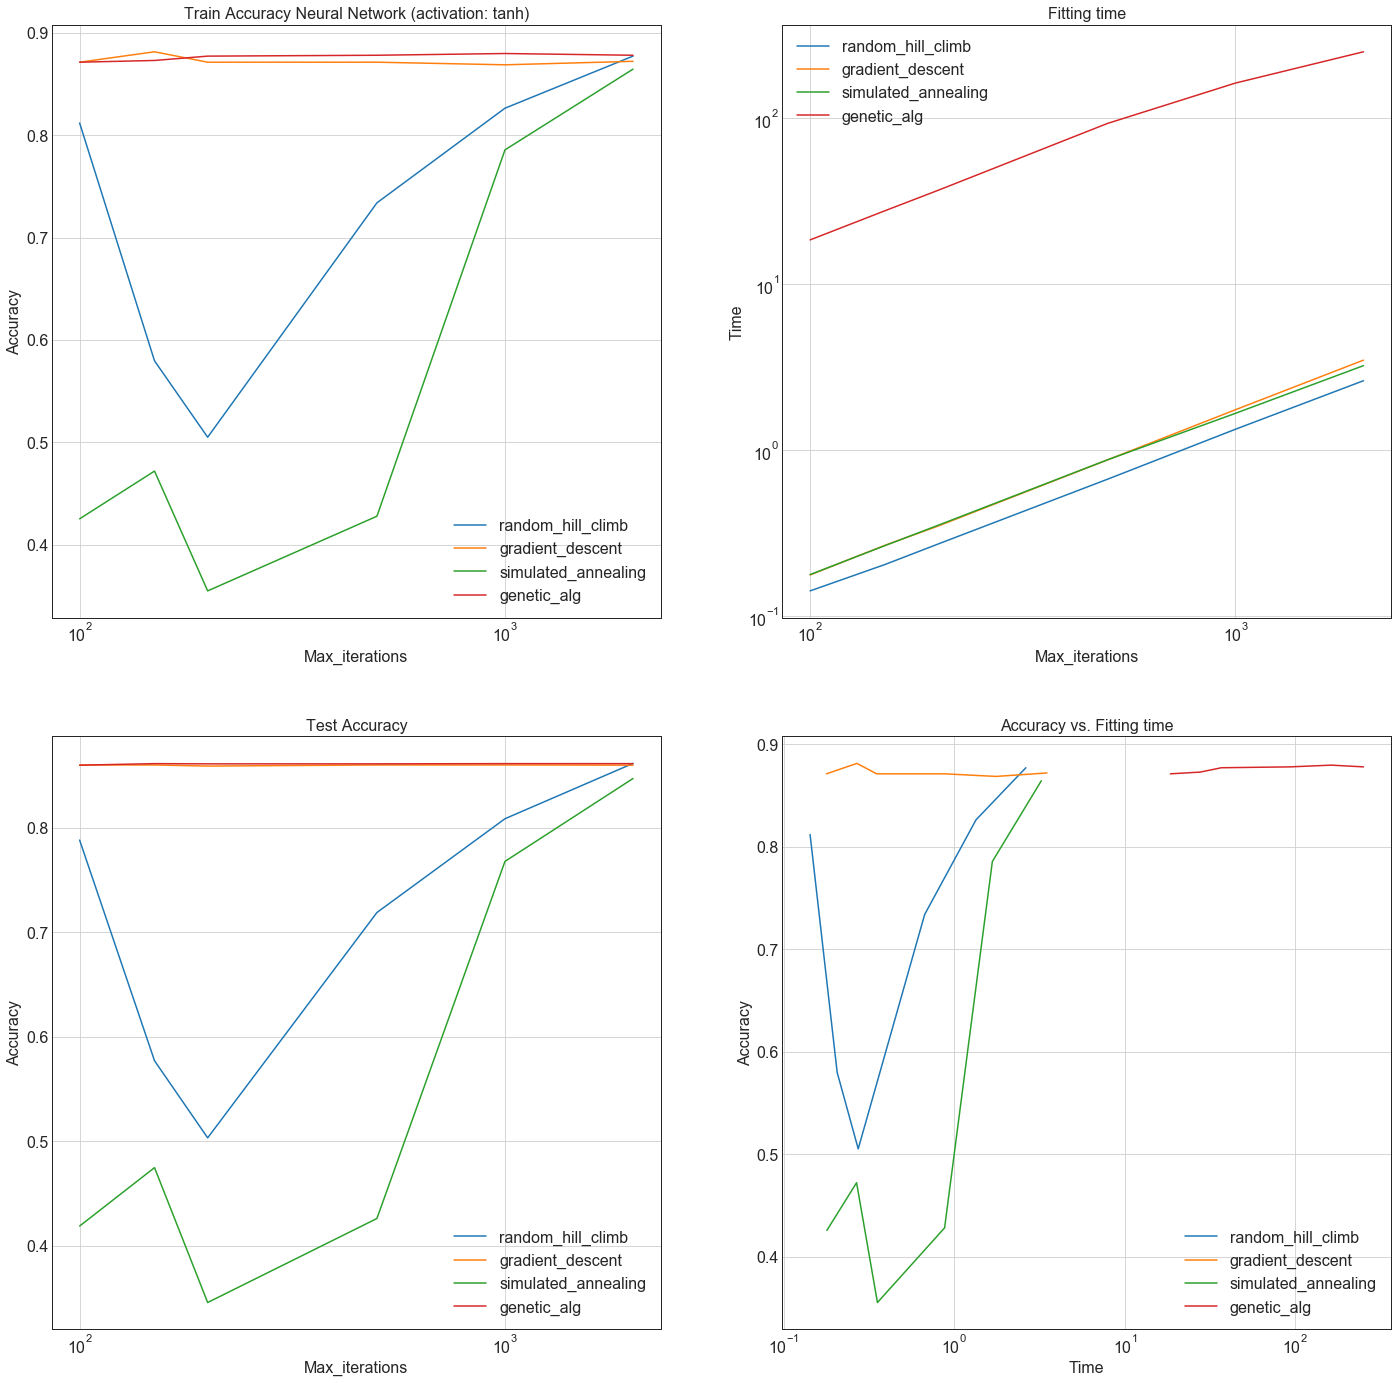

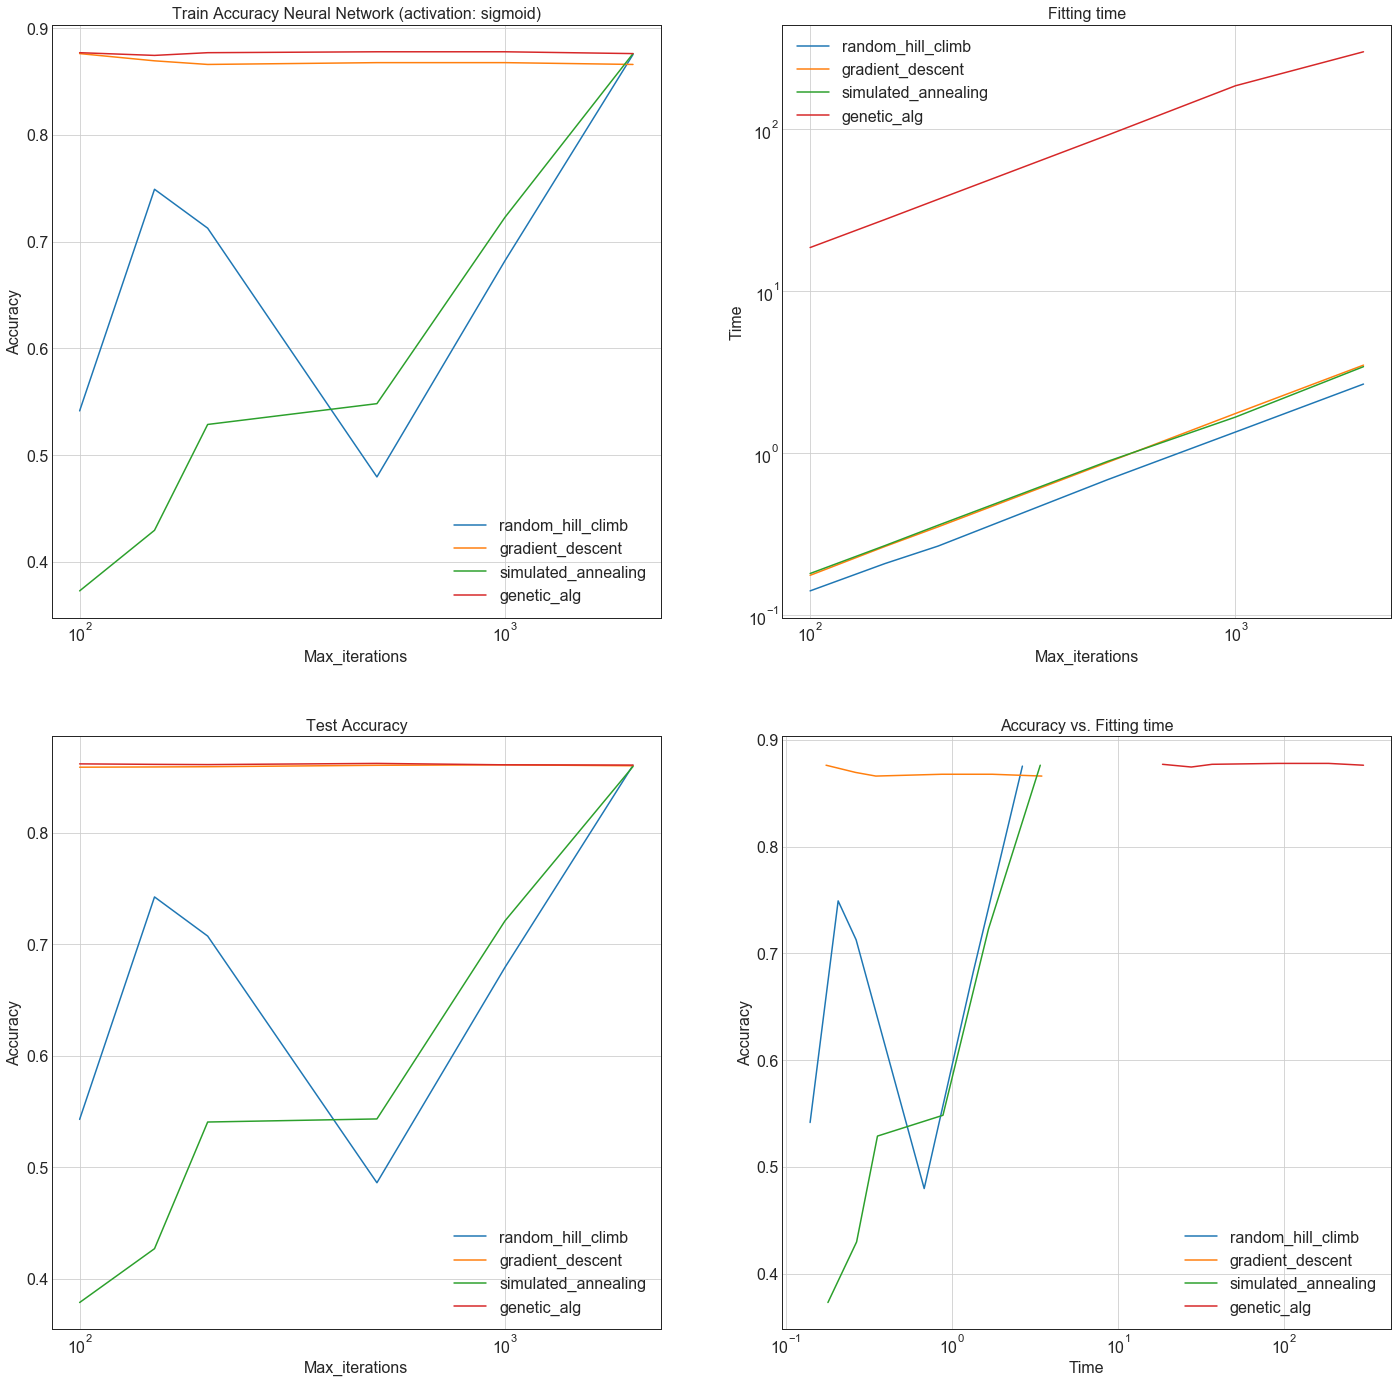

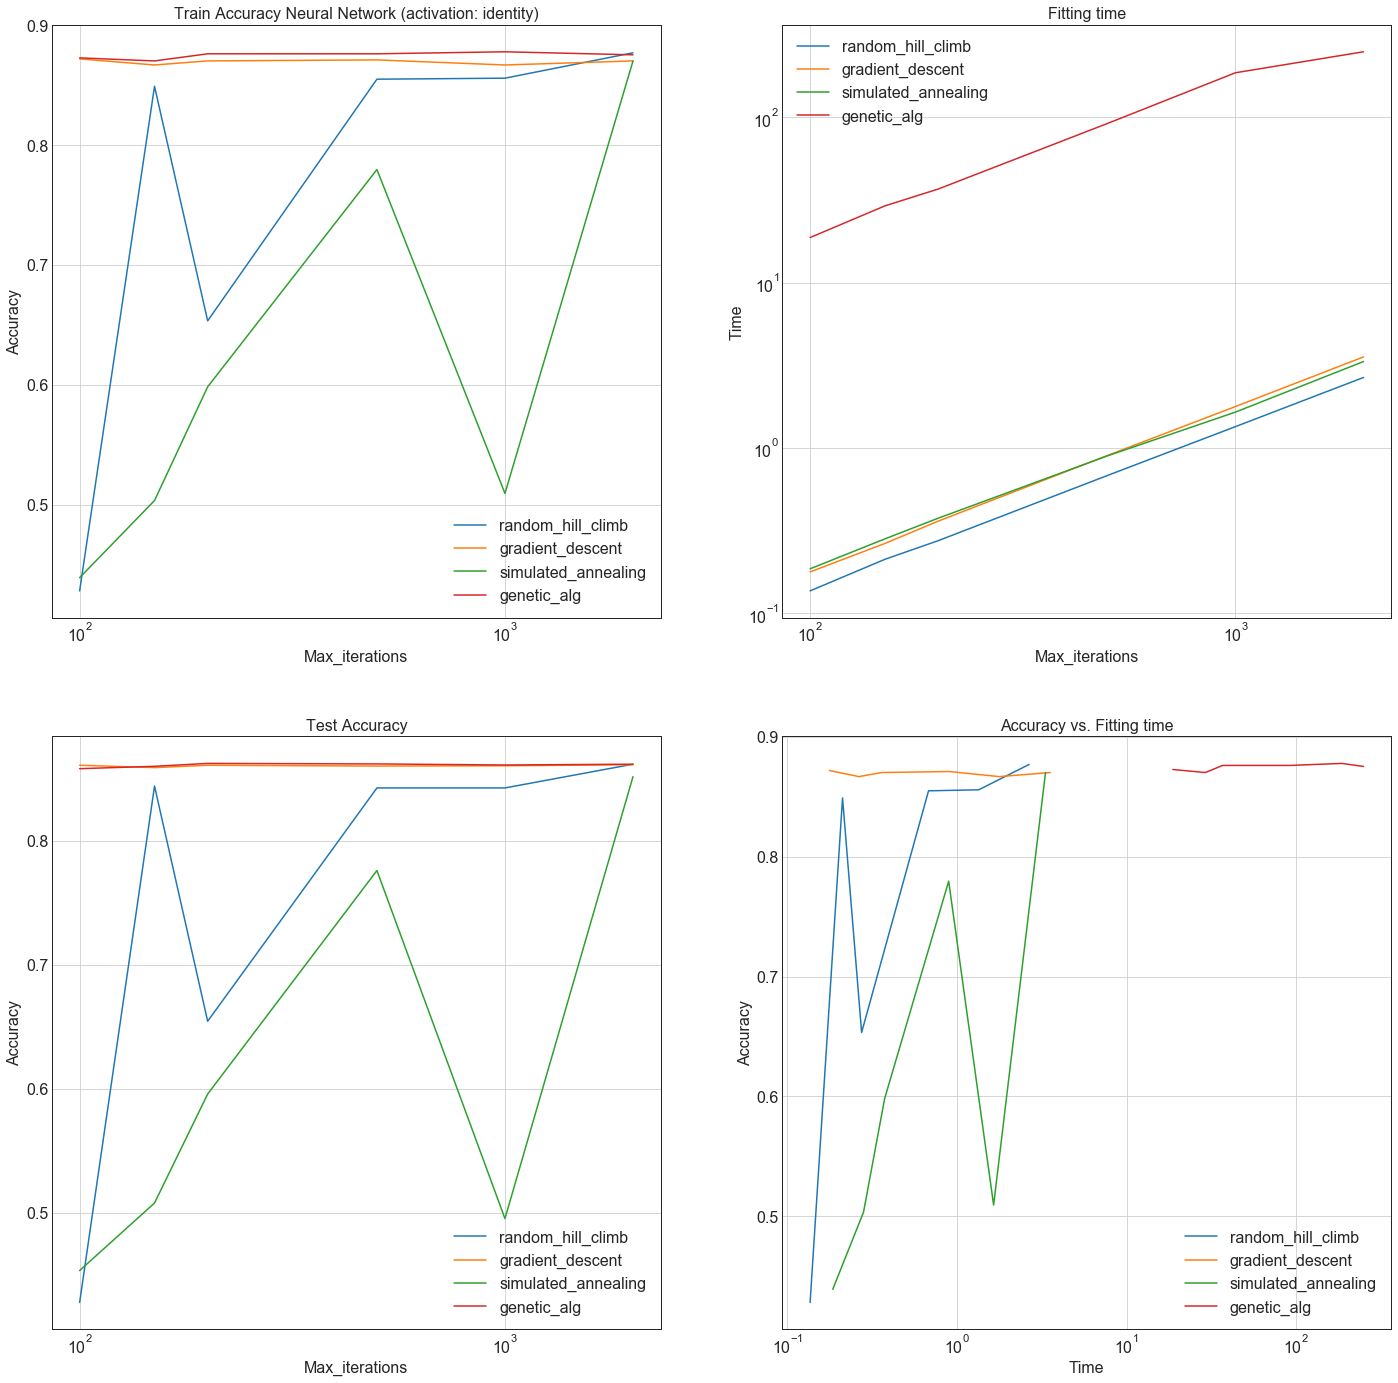

In [253]:
from sklearn.metrics import accuracy_score

acti_list = ['relu', 'tanh', 'sigmoid', 'identity']
iteration = [ 100, 150, 200, 500, 1000, 2000]
algo = ['random_hill_climb', 'gradient_descent', 'simulated_annealing', 'genetic_alg']

for acti in acti_list: 
    
    f, axes = plt.subplots(2, 2, figsize = (24, 24))
    titre = "Train Accuracy Neural Network (activation: "+ acti+")"
    
    axes[0,0].set_title(titre)
    axes[0,0].set_xlabel("Max_iterations")
    axes[0,0].set_ylabel("Accuracy")
    axes[0,0].set_xscale('log')
    axes[0,0].grid()
    
    axes[1,0].set_title("Test Accuracy")
    axes[1,0].set_xlabel("Max_iterations")
    axes[1,0].set_ylabel("Accuracy")
    axes[1,0].set_xscale('log')
    axes[1,0].grid()
    
    axes[0,1].set_title("Fitting time")
    axes[0,1].set_xlabel("Max_iterations")
    axes[0,1].set_ylabel("Time")
    axes[0,1].set_xscale('log')
    axes[0,1].set_yscale('log')
    axes[0,1].grid()
    
    axes[1,1].set_title("Accuracy vs. Fitting time")
    axes[1,1].set_xlabel("Time")
    axes[1,1].set_ylabel("Accuracy")
    axes[1,1].set_xscale('log')
    axes[1,1].grid()
    
    for alg in algo:
        
        test_acc = list()
        train_acc = list()
        fittime = list()
        
        for i in iteration:
            
            test_acc_f = np.zeros(5)
            train_acc_f = np.zeros(5)
            fittime_f = np.zeros(5)
            
            for k in range(5):
                nn_model = mlrose_hiive.NeuralNetwork(activation = acti, algorithm = alg, max_iters = i,
                                         bias = True, is_classifier = True, learning_rate = 0.01, early_stopping = True,
                                         clip_max = 5, max_attempts = 100)

                t1 = time.time()
                nn_model.fit(hosX_tr, hosy_tr)
                fit_time = time.time() - t1
                fittime_f[k] = fit_time

                y_train_pred = nn_model.predict(hosX_tr)
                y_train_acc = accuracy_score(hosy_tr, y_train_pred)
                train_acc_f[k] = y_train_acc

                y_test_pred = nn_model.predict(hosX_te)
                y_test_acc = accuracy_score(hosy_te, y_test_pred)
                test_acc_f[k] = y_test_acc
            
            
            y_test_acc_moy = np.mean(test_acc_f)
            y_train_acc_moy = np.mean(train_acc_f)
            fit_time_moy = np.mean(fittime_f)

            test_acc.append(y_test_acc_moy)
            train_acc.append(y_train_acc_moy)
            fittime.append(fit_time_moy)
        
        axes[0,0].plot(iteration, test_acc, label = alg)
        axes[1,0].plot(iteration, train_acc, label = alg)
        axes[0,1].plot(iteration, fittime, label = alg)
        axes[1,1].plot(fittime, test_acc, label = alg)
    
    
    axes[0,0].legend(loc="best")
    axes[1,0].legend(loc="best")
    axes[0,1].legend(loc="best")
    axes[1,1].legend(loc = "best")
    plt.savefig("NN"+acti+".png")